## 🧩 Problem Statement
Telecom providers often face high churn rates due to pricing competition, service dissatisfaction, and lack of engagement.  
The challenge is to **identify customers at risk of leaving** before they actually churn, so targeted retention campaigns can be launched effectively.

> **Goal:** Build a robust machine learning model that predicts customer churn and uncover the top features influencing customer retention.

Specifically, the project aims to:
- Analyze churn patterns through **Exploratory Data Analysis (EDA)**  
- Visualize and interpret churn behavior across demographics, contract types, and service features  
- Train multiple machine learning models to **accurately predict churn probability**  
- Compare performance using **ROC-AUC, confusion matrices, and learning curves**  
- Provide actionable business insights from model explainability and feature correlations  

---

## 🧠 Techniques & Tools Used
This project combines **data science, feature engineering, and model optimization** to achieve strong predictive performance.

### 🔍 Data Analysis & Preprocessing
- **Exploratory Data Analysis (EDA):** Identified patterns in churn behavior by demographics, services, and payment types.  
- **Feature Encoding:** One-hot encoding for categorical variables and scaling for continuous ones.  
- **Handling Imbalance:** Techniques like **SMOTE** or **class weighting** were used to balance churn vs non-churn samples.  

### 🤖 Machine Learning Models
- **Logistic Regression:** Baseline interpretable model for churn probability.  
- **Random Forest Classifier:** Ensemble learning for robust generalization.  
- **XGBoost Classifier:** Optimized boosting algorithm for top performance on tabular data.

### 📊 Model Evaluation
- **ROC-AUC Score** to assess discrimination power  
- **Confusion Matrices** to compare prediction accuracy  
- **Learning Curves** to ensure no overfitting and consistent performance across training sizes  

### 🧩 Feature Importance & Insights
- **Correlation Analysis** to identify top churn drivers  
- Insights on service-related churn such as **fiber optic usage, contract type, and payment method**  
- Actionable recommendations to enhance **customer retention strategies**  

### 🛠️ Tech Stack
- Python, Pandas, NumPy, Scikit-learn, XGBoost, Matplotlib, Seaborn  
- Jupyter Notebook / Google Colab for model development  
- Streamlit for interactive dashboard deployment (optional)  

---

✨ **Result:**  
Achieved a **ROC-AUC score of ~0.99** with XGBoost, demonstrating exceptional predictive accuracy and generalization performance.  
The insights derived can directly guide **data-backed marketing and retention campaigns**, reducing churn and improving customer lifetime value.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
for cols in df.columns:
  print(f"\nColumn: {cols}")
  print(df[cols].unique())
  print('*'*20)


Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
********************

Column: gender
['Female' 'Male']
********************

Column: SeniorCitizen
[0 1]
********************

Column: Partner
['Yes' 'No']
********************

Column: Dependents
['No' 'Yes']
********************

Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
********************

Column: PhoneService
['No' 'Yes']
********************

Column: MultipleLines
['No phone service' 'No' 'Yes']
********************

Column: InternetService
['DSL' 'Fiber optic' 'No']
********************

Column: OnlineSecurity
['No' 'Yes' 'No internet service']
********************

Column: OnlineBackup
['Yes' 'No' 'No internet service']
********************

Column: DeviceProtection
['No' 'Yes' 'N

In [ ]:
df.shape

(7043, 21)

In [ ]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The table above provides descriptive statistics for three numerical columns in the dataset — SeniorCitizen, tenure, and MonthlyCharges. Let’s interpret each one:

1. SeniorCitizen

Type: Binary indicator (0 = Not Senior Citizen, 1 = Senior Citizen).

Mean: 0.162 → Around 16% of customers are senior citizens.

Std: 0.369 → Low variability since most customers belong to one group (non-seniors).

Insight: This feature can be treated as a categorical variable.

2. tenure

Definition: Number of months the customer has stayed with the company.

Range: 0 to 72 months.

Mean: 32.37 months → On average, customers stay for about 2.7 years.

Distribution:

25% of customers have tenure ≤ 9 months (new customers).

50% (median) have tenure ≤ 29 months.

25% have tenure ≥ 55 months (loyal customers).

Insight: Tenure may have a strong relationship with churn — customers with shorter tenures are more likely to churn.

3. MonthlyCharges

Definition: The monthly amount charged to the customer.

Range: 18.25 to 118.75 (or equivalent units).

Mean: 64.76 → The average customer pays around ₹65 per month.

Distribution:

25% pay below 35.50.

50% (median) pay around 70.35.

25% pay above 89.85.

Insight: Monthly charges are spread across a wide range, suggesting different plan types and service levels.

🧩 Overall Observation:

The dataset includes both categorical-like numerical features (SeniorCitizen) and continuous ones (tenure, MonthlyCharges).

There’s a clear difference in scale, so normalization or standardization might be required before model training.

EDA

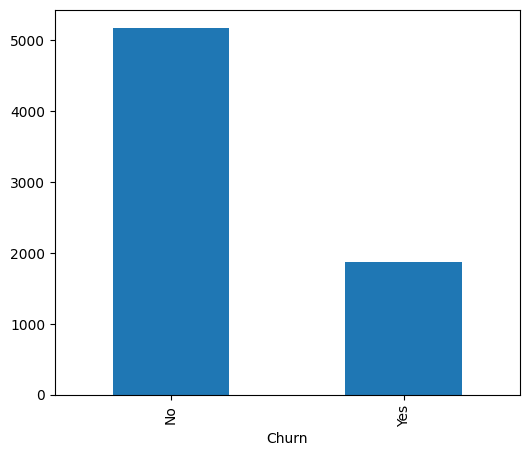

In [ ]:
df['Churn'].value_counts().plot(kind='bar',figsize=(6,5))
plt.show()

In [ ]:
print(100*df['Churn'].value_counts()/len(df['Churn']))

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64


Imbalanced data,
73% of the data belongs to the No class and 26% of the data belongs to the Yes class.
this info is uselful as we need  equal no of classes so that we train our model for prediction without any bias

DATA CLEANING

In [ ]:
df_copy = df.copy()

Now, total_charges column should be numeric instead of object, we will convert this column to numeric

In [ ]:
df_copy.TotalCharges = pd.to_numeric(df_copy.TotalCharges,errors='coerce')


In [ ]:
df_copy.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df_copy.dropna(how='any',inplace=True)

In [ ]:
bins = [0, 12, 24, 48, 72]
labels = ['0-12 months', '13-24 months', '25-48 months', '49-72 months']


df_copy['tenure_group'] = pd.cut(df_copy['tenure'], bins=bins, labels=labels, include_lowest=True)


print(df_copy['tenure_group'].value_counts())

tenure_group
49-72 months    2239
0-12 months     2175
25-48 months    1594
13-24 months    1024
Name: count, dtype: int64


In [ ]:
df_copy.drop(columns=['tenure','customerID'],axis=1,inplace=True)

MAIN EDA

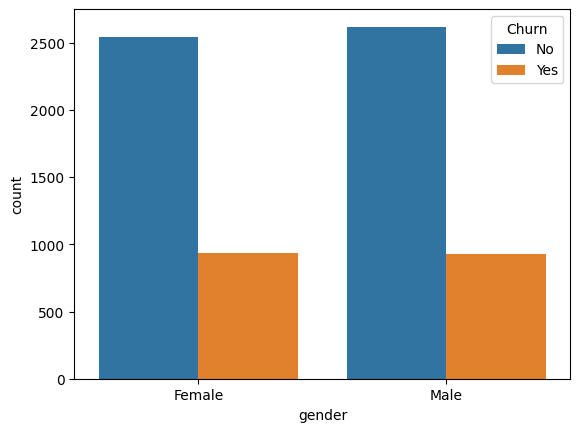

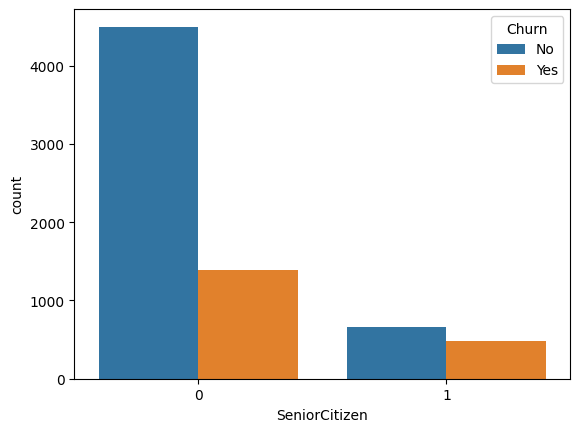

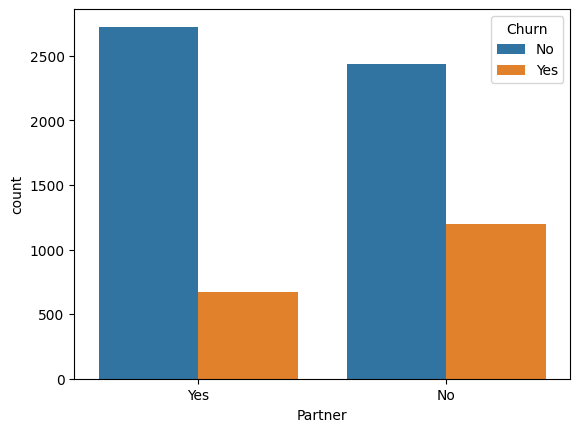

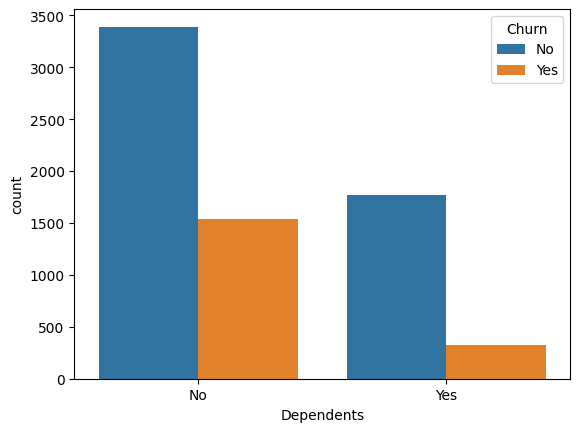

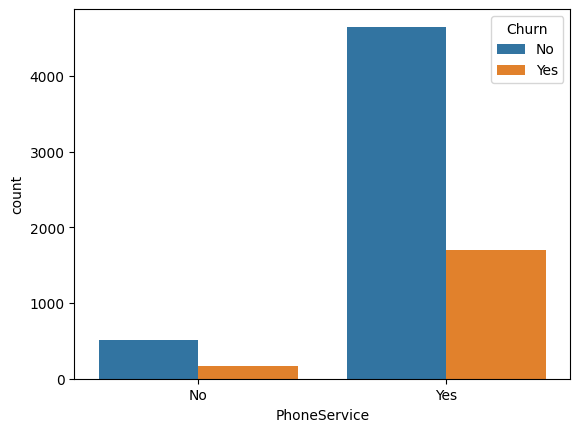

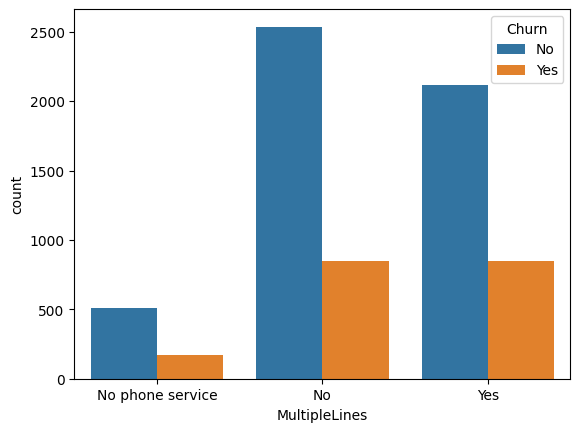

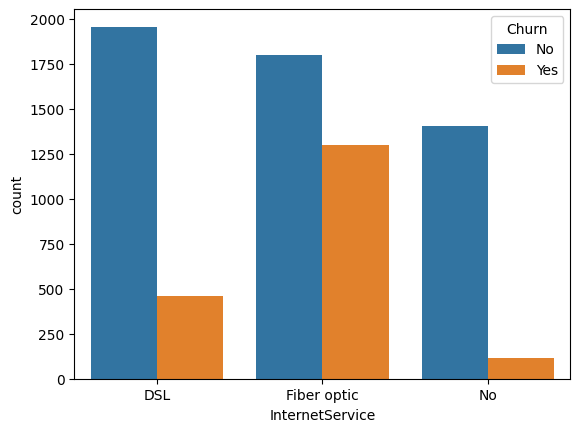

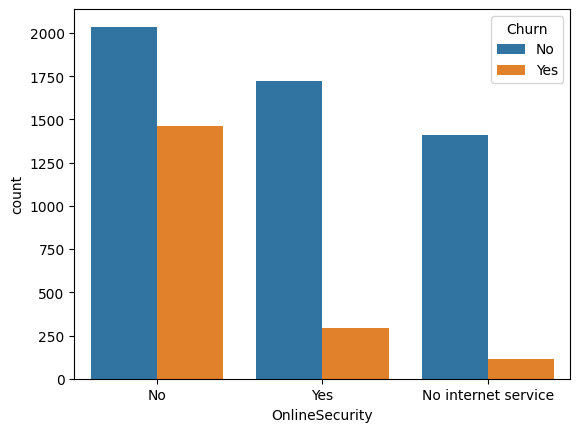

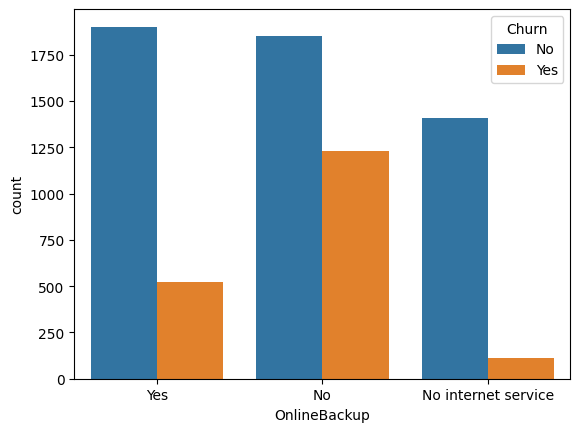

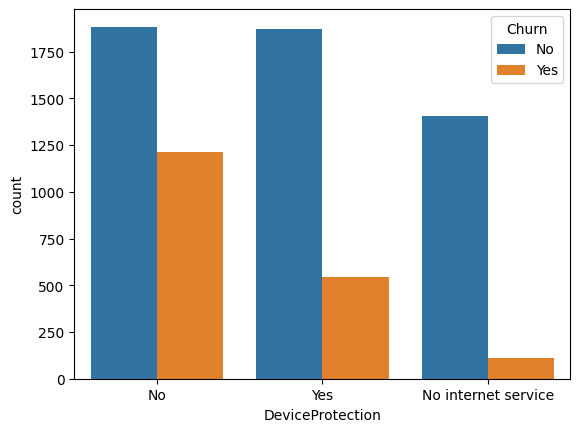

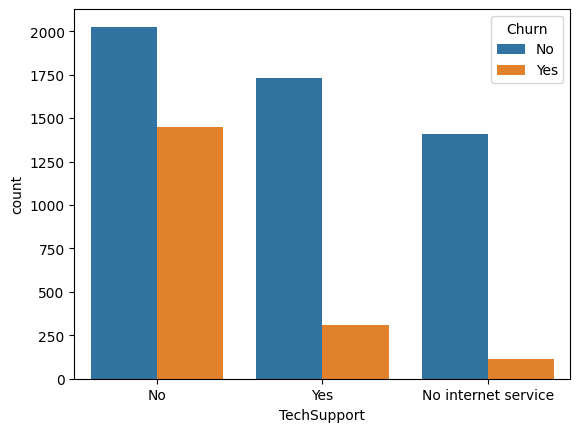

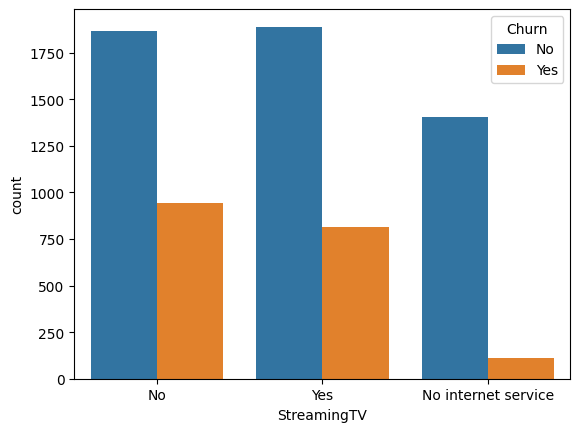

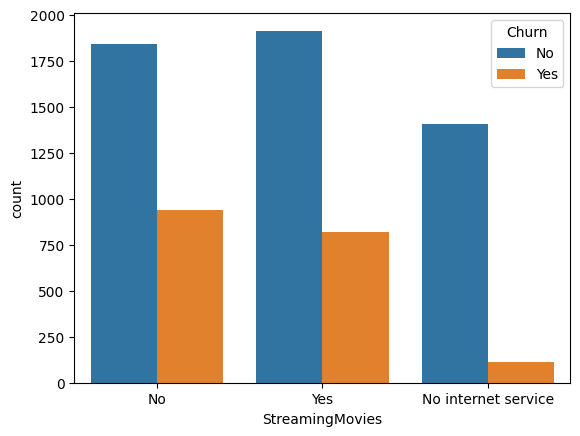

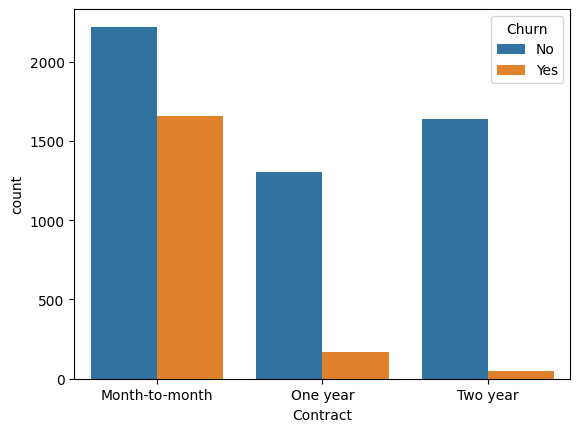

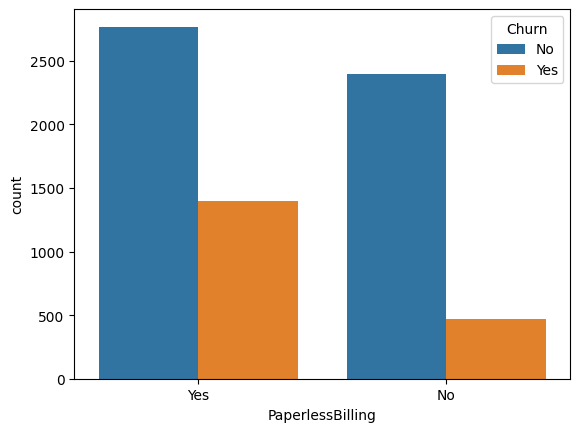

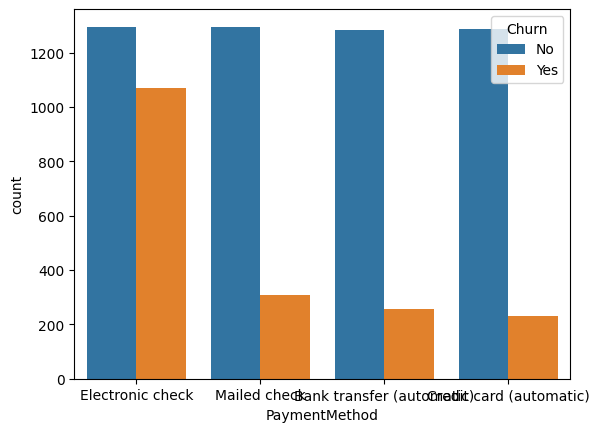

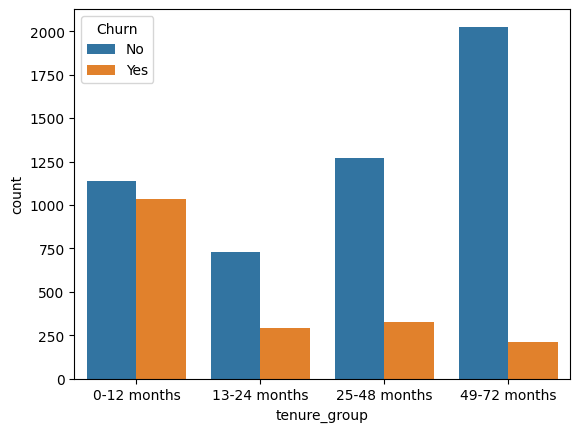

In [ ]:
for i, predictor in enumerate(df_copy.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=df_copy,x=predictor,hue='Churn')

In [ ]:
df_copy['Churn'] = df_copy['Churn'].replace({'Yes': 1, 'No': 0})


/tmp/ipython-input-439145582.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Churn'] = df_copy['Churn'].replace({'Yes': 1, 'No': 0})


In [ ]:
df_copy['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


NOW CONVERT CATEGORICAL VARIABLES TO NUMERICAL VARIABLES USING ON HOT ENCODING


In [ ]:
import pandas as pd

# Identify categorical columns
cat_cols = df_copy.select_dtypes(include=['object']).columns
print("Categorical columns:\n", cat_cols)

# One-hot encode directly into df_copy
df_copy = pd.get_dummies(df_copy, columns=cat_cols, drop_first=True)

# Check result
print("\nDataFrame shape after encoding:", df_copy.shape)
print("\nSample columns after encoding:\n", df_copy.columns[:10])


Categorical columns:
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

DataFrame shape after encoding: (7032, 31)

Sample columns after encoding:
 Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service'],
      dtype='object')


In [ ]:
df_copy.shape

(7032, 31)

In [ ]:
df_encoded.shape

(7032, 31)

/tmp/ipython-input-1279629966.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_copy[df_copy['Churn'] == 0]['MonthlyCharges'], label='No Churn', shade=True)
/tmp/ipython-input-1279629966.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_copy[df_copy['Churn'] == 1]['MonthlyCharges'], label='Churn', shade=True, color='r')


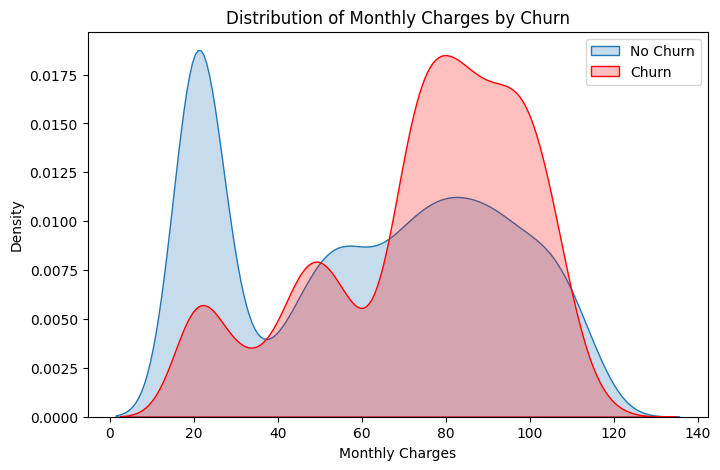

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_copy[df_copy['Churn'] == 0]['MonthlyCharges'], label='No Churn', shade=True)
sns.kdeplot(data=df_copy[df_copy['Churn'] == 1]['MonthlyCharges'], label='Churn', shade=True, color='r')
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()


INSIGHT: WHEN MONTHLY CHARGES ARE HIGH, CHURN RATE IS HIGH

In [ ]:
# Compute correlation matrix
corr = df_copy.corr(numeric_only=True)

# Sort correlations with respect to Churn
churn_corr = corr['Churn'].sort_values(ascending=False)

# Display correlation values
print(churn_corr)

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


/tmp/ipython-input-2268133219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='coolwarm')


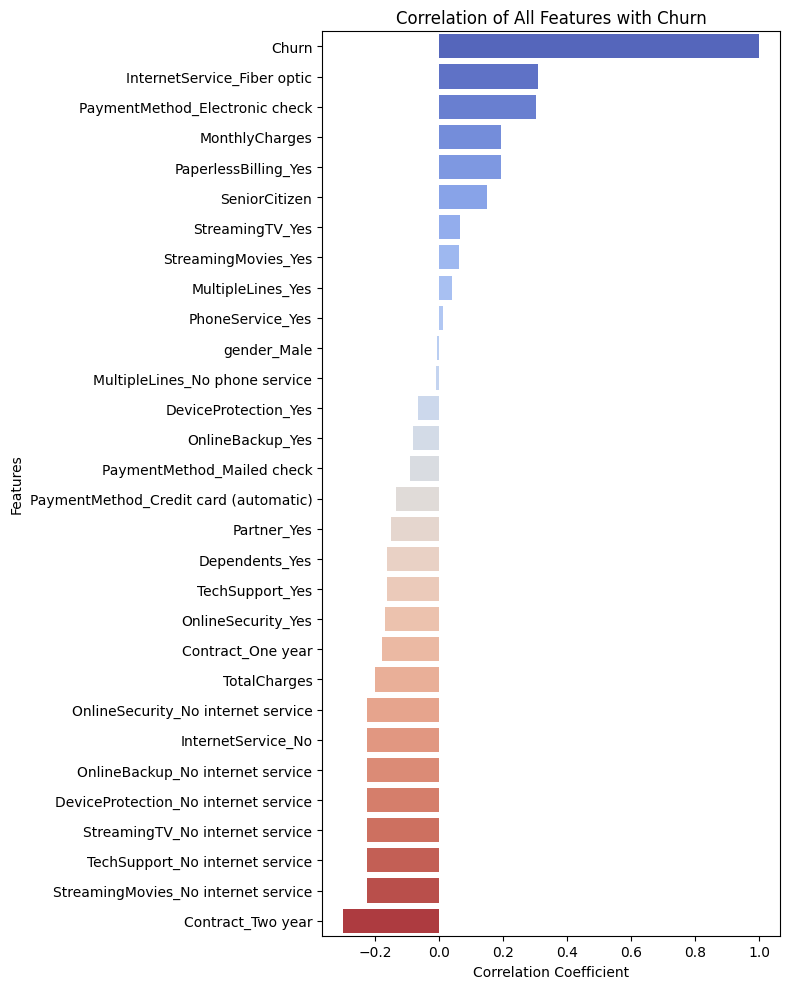

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='coolwarm')
plt.title('Correlation of All Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2302127505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tenure_group', y='Churn', data=df_copy, palette='coolwarm')


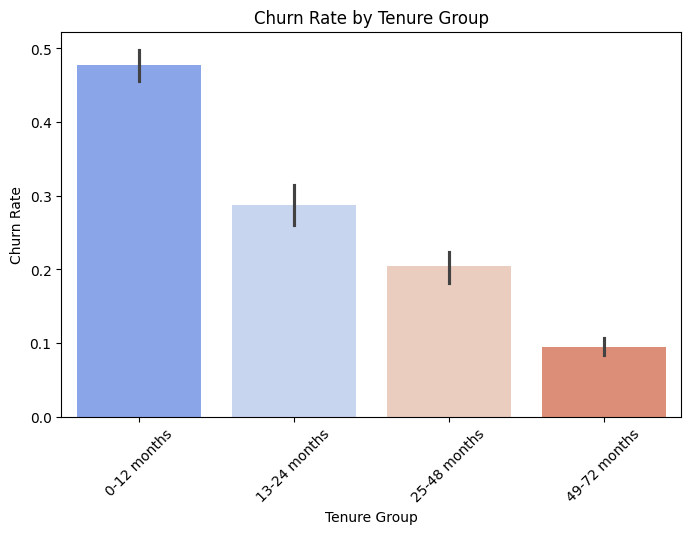

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='tenure_group', y='Churn', data=df_copy, palette='coolwarm')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df_copy.columns)


Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


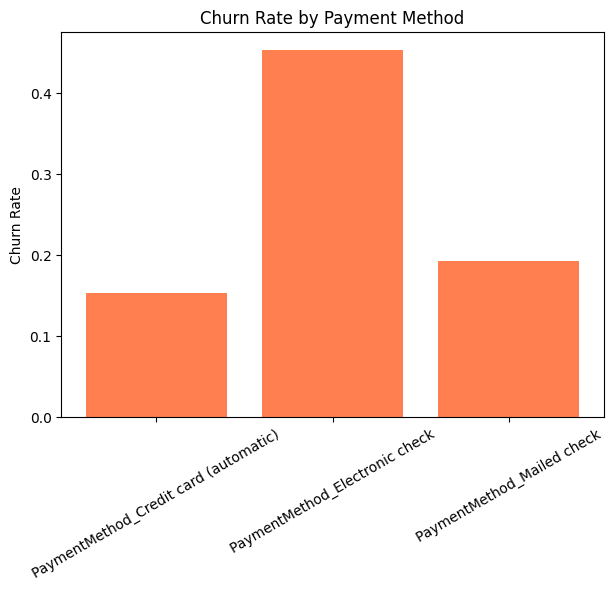

In [ ]:
import matplotlib.pyplot as plt

payment_cols = [
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check'
]

# Calculate churn rate for each payment type
churn_rate = df_copy.groupby(payment_cols)['Churn'].mean()

# Or simpler: calculate churn rate for each column
churn_rate = {}
for col in payment_cols:
    churn_rate[col] = df_copy[df_copy[col]==1]['Churn'].mean()

# Plot
plt.figure(figsize=(7,5))
plt.bar(churn_rate.keys(), churn_rate.values(), color='coral')
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=30)
plt.show()


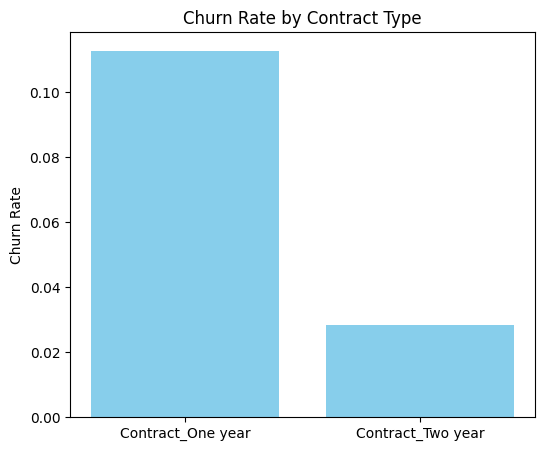

In [ ]:
contract_cols = ['Contract_One year', 'Contract_Two year']

churn_rate_contract = {}
for col in contract_cols:
    churn_rate_contract[col] = df_copy[df_copy[col]==1]['Churn'].mean()

plt.figure(figsize=(6,5))
plt.bar(churn_rate_contract.keys(), churn_rate_contract.values(), color='skyblue')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()


/tmp/ipython-input-4023421523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df_copy, palette='coolwarm')


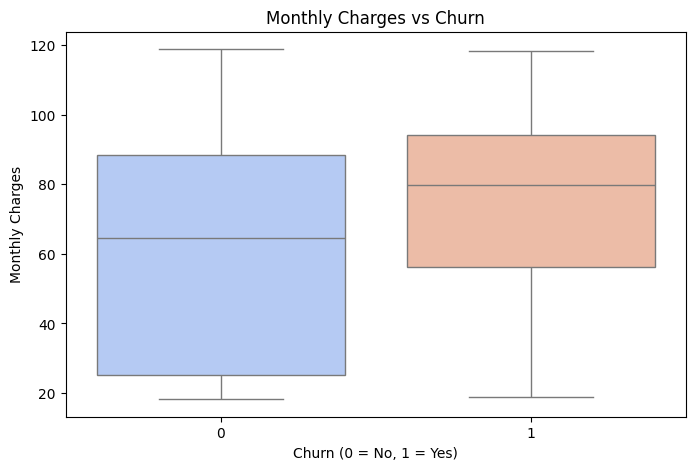

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_copy, palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.show()


In [ ]:
# List all columns that still have Yes/No
dummy_cols = df_copy.columns[df_copy.dtypes == 'object']  # usually selects remaining object types

# Replace with numeric
df_copy[dummy_cols] = df_copy[dummy_cols].replace({
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0
})

# Check
print(df_copy[dummy_cols].head())


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [ ]:
# Replace 'Yes', 'No', 'No internet service', 'No phone service' with 1/0
df_copy = df_copy.replace({
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0
})


In [ ]:
print(df_copy.head())
print(df_copy.dtypes.value_counts())


   SeniorCitizen  MonthlyCharges  TotalCharges  Churn  tenure_group  \
0              0           29.85         29.85      0   0-12 months   
1              0           56.95       1889.50      0  25-48 months   
2              0           53.85        108.15      1   0-12 months   
3              0           42.30       1840.75      0  25-48 months   
4              0           70.70        151.65      1   0-12 months   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False         True           False             False   
1         True        False           False              True   
2         True        False           False              True   
3         True        False           False             False   
4        False        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           Fals

In [ ]:
bool_cols = df_copy.select_dtypes(include='bool').columns
df_copy[bool_cols] = df_copy[bool_cols].astype(int)

# Check
print(df_copy[bool_cols].head())


   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            0            1               0                 0   
1            1            0               0                 1   
2            1            0               0                 1   
3            1            0               0                 0   
4            0            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                               1                  0   
1                               0                  0   
2                               0                  0   
3                               1                  0   
4                               0                  0   

   InternetService_Fiber optic  InternetService_No  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3                            0                   0   
4 

In [ ]:
df_copy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,tenure_group,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,56.95,1889.50,0,2,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,53.85,108.15,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,42.30,1840.75,0,2,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_copy['tenure_group'] = le.fit_transform(df_copy['tenure_group'])


In [ ]:
df_copy.shape

(7032, 31)

In [ ]:
X = df_copy.drop('Churn', axis=1)
y = df_copy['Churn']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['tenure_group', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter

smote_enn = SMOTEENN(random_state=42)
X_res,y_res = smote_enn.fit_resample(X, y)
xr_train,xr_test,yr_train,yr_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

print("Before SMOTEENN:", Counter(y_train))
print("After SMOTEENN:", Counter(yr_train))


Before SMOTEENN: Counter({0: 4130, 1: 1495})
After SMOTEENN: Counter({1: 2577, 0: 2093})


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       569
           1       0.93      0.97      0.95       599

    accuracy                           0.95      1168
   macro avg       0.95      0.95      0.95      1168
weighted avg       0.95      0.95      0.95      1168

ROC-AUC Score: 0.9904806194272235


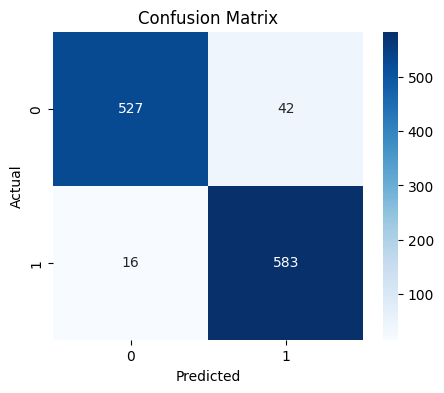

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(xr_train, yr_train)

y_pred = rf.predict(xr_test)
y_prob = rf.predict_proba(xr_test)[:,1]

# Evaluation
print("Classification Report:\n", classification_report(yr_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(yr_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(yr_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from collections import defaultdict


In [ ]:
results = defaultdict(dict)


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr_params = {
    'C':[0.01, 0.1, 1, 10],
    'penalty':['l2'],
    'solver':['lbfgs']
}

lr_grid = GridSearchCV(lr, param_grid=lr_params, scoring='roc_auc', cv=cv, n_jobs=-1)
lr_grid.fit(xr_train, yr_train)

best_lr = lr_grid.best_estimator_
y_pred_lr = best_lr.predict(xr_test)
y_prob_lr = best_lr.predict_proba(xr_test)[:,1]

results['LogisticRegression']['ROC-AUC'] = roc_auc_score(yr_test, y_prob_lr)
print("Logistic Regression Best Params:", lr_grid.best_params_)


Logistic Regression Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_params = {
    'n_estimators':[100, 200],
    'max_depth':[3,5,7],
    'learning_rate':[0.01, 0.1, 0.2],
    'subsample':[0.8,1]
}

xgb_grid = GridSearchCV(xgb, param_grid=xgb_params, scoring='roc_auc', cv=cv, n_jobs=-1)
xgb_grid.fit(xr_train, yr_train)

best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(xr_test)
y_prob_xgb = best_xgb.predict_proba(xr_test)[:,1]

results['XGBoost']['ROC-AUC'] = roc_auc_score(yr_test, y_prob_xgb)
print("XGBoost Best Params:", xgb_grid.best_params_)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:16:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}


In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_params = {
    'n_estimators':[100, 200],
    'max_depth':[5, 10, None],
    'min_samples_split':[2, 5]
}

rf_grid = GridSearchCV(rf, param_grid=rf_params, scoring='roc_auc', cv=cv, n_jobs=-1)
rf_grid.fit(xr_train, yr_train)

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(xr_test)
y_prob_rf = best_rf.predict_proba(xr_test)[:,1]

results['RandomForest']['ROC-AUC'] = roc_auc_score(yr_test, y_prob_rf)
print("Random Forest Best Params:", rf_grid.best_params_)


Random Forest Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:


results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='ROC-AUC', ascending=False)
print(results_df)


                     ROC-AUC
XGBoost             0.990541
RandomForest        0.990331
LogisticRegression  0.984608


In [ ]:
models = {
    'XGBoost': best_xgb,
    'RandomForest': best_rf,
    'LogisticRegression': best_lr
}

# Create new columns for metrics
for name, model in models.items():
    y_pred = model.predict(xr_test)
    y_prob = model.predict_proba(xr_test)[:,1]

    report = classification_report(yr_test, y_pred, output_dict=True)

    results_df.loc[name, 'Accuracy'] = report['accuracy']
    results_df.loc[name, 'Precision_0'] = report['0']['precision']
    results_df.loc[name, 'Recall_0'] = report['0']['recall']
    results_df.loc[name, 'F1_0'] = report['0']['f1-score']
    results_df.loc[name, 'Precision_1'] = report['1']['precision']
    results_df.loc[name, 'Recall_1'] = report['1']['recall']
    results_df.loc[name, 'F1_1'] = report['1']['f1-score']
    results_df.loc[name, 'ROC-AUC'] = roc_auc_score(yr_test, y_prob)

# Display updated results
results_df


,ROC-AUC,Accuracy,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
XGBoost,0.990541,0.952911,0.970696,0.931459,0.950673,0.937299,0.973289,0.954955
RandomForest,0.990331,0.952055,0.972376,0.927944,0.949640,0.934400,0.974958,0.954248
LogisticRegression,0.984608,0.941781,0.949731,0.929701,0.939609,0.934534,0.953255,0.943802


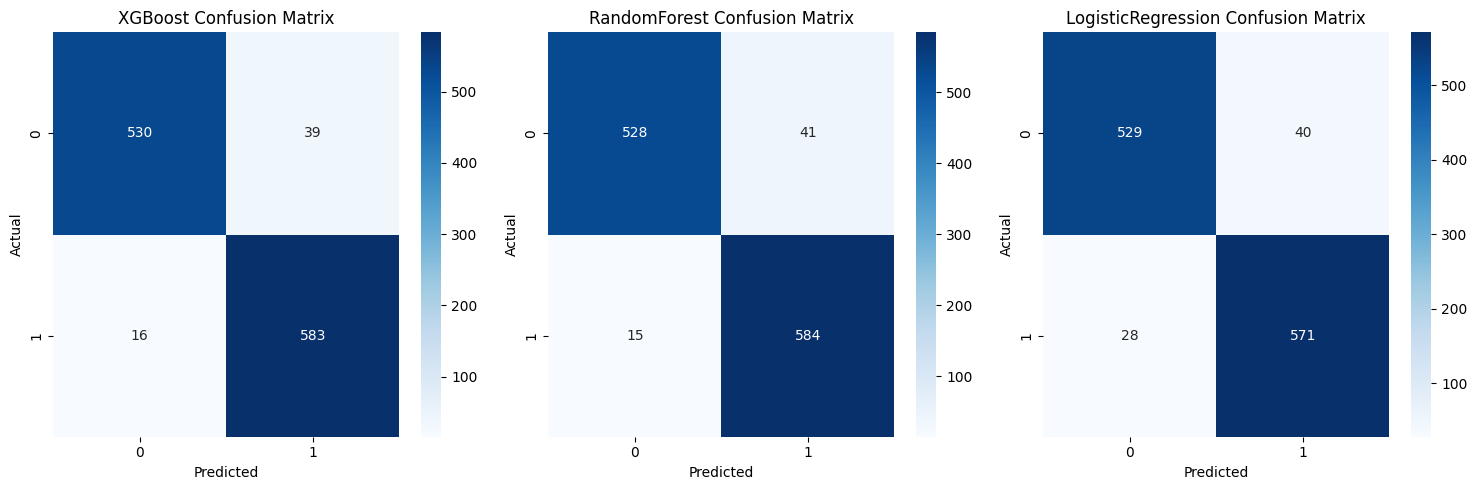

In [ ]:
plt.figure(figsize=(15,5))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(xr_test)
    cm = confusion_matrix(yr_test, y_pred)

    plt.subplot(1,3,i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_xgb, xr_train, yr_train, cv=5, scoring='roc_auc')
print("Cross-validated ROC-AUC:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:22:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:22:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:22:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:23:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:23:01] WARNING: /w

Cross-validated ROC-AUC: [0.98918577 0.99041208 0.98807146 0.99012443 0.9913247 ]
Mean CV ROC-AUC: 0.989823686531472


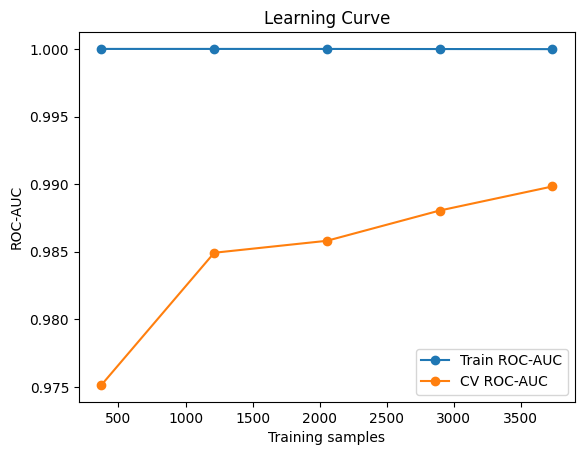

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_xgb, xr_train, yr_train, cv=5, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1,1.0,5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label='Train ROC-AUC')
plt.plot(train_sizes, test_mean, 'o-', label='CV ROC-AUC')
plt.xlabel('Training samples')
plt.ylabel('ROC-AUC')
plt.title('Learning Curve')
plt.legend()
plt.show()
